In [1]:
import pandas as pd

In [2]:
LumA = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\results\round 2 boruta\rank1 only\LumA_rank1only.csv')
LumB = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\results\round 2 boruta\rank1 only\LumB_rank1only.csv')
her2 = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\results\round 2 boruta\rank1 only\her2_rank1only.csv')
basal = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\results\round 2 boruta\rank1 only\basal_rank1only.csv')
normal = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\results\round 2 boruta\rank1 only\normal_rank1only.csv')

In [3]:
intersection = set(LumA.Feature) & set(LumB.Feature) & set(her2.Feature) & set(basal.Feature) & set(normal.Feature)
inter = list(intersection)

In [4]:
LumA_fc = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\foldchange\LumA_fc.csv',index_col=[0])
LumB_fc = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\foldchange\LumB_fc.csv',index_col=[0])
her2_fc = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\foldchange\her2_fc.csv',index_col=[0])
basal_fc = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\foldchange\basal_fc.csv',index_col=[0])
normal_fc = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\foldchange\normal_fc.csv',index_col=[0])

In [5]:
inter_LumA= LumA_fc.loc[inter]
inter_LumB= LumB_fc.loc[inter]
inter_her2= her2_fc.loc[inter]
inter_basal= basal_fc.loc[inter]
inter_normal= normal_fc.loc[inter]


In [6]:
cols = ['genes','logFC']
inter_LumA = inter_LumA[cols]
inter_LumB = inter_LumB[cols]
inter_her2 = inter_her2[cols]
inter_basal = inter_basal[cols]
inter_normal = inter_normal[cols]


In [7]:
inter_LumA = inter_LumA.join(inter_LumB.logFC, lsuffix='_LumA',rsuffix='_LumB')
inter_LumA = inter_LumA.join(inter_her2.logFC)
inter_LumA = inter_LumA.join(inter_basal.logFC, lsuffix='_her2',rsuffix='_basal')
inter_LumA = inter_LumA.join(inter_normal.logFC)
inter_LumA.rename(columns = {'logFC':'logFC_normal'}, inplace = True)


In [8]:
genes = list(inter_LumA['genes'])
genes_to_convert = [item.split('.',1)[0] for item in genes]
genes_to_convert = '\n'.join(genes_to_convert)


In [9]:
from gprofiler import GProfiler

gp = GProfiler(return_dataframe=True)
converted = gp.convert(organism='hsapiens',
            query=genes_to_convert,
            target_namespace='ENTREZGENE_ACC')


In [10]:
converted.loc[converted['incoming']=='ENSG00000229246','name']='LINC00377'
converted.loc[converted['incoming']=='ENSG00000229246','description']='long intergenic non-protein coding RNA 377 [Source:HGNC Symbol;Acc:HGNC:42703]'
converted.loc[converted['incoming']=='ENSG00000286214','name']='COPG2IT1'
converted.loc[converted['incoming']=='ENSG00000286214','description']='COPG2 imprinted transcript 1 [Source:HGNC Symbol;Acc:HGNC:2238]'
converted.loc[converted['incoming']=='ENSG00000225398','name']='PGM5P4'
converted.loc[converted['incoming']=='ENSG00000225398','description']='phosphoglucomutase 5 pseudogene 4 [Source:HGNC Symbol;Acc:HGNC:49605]'
display(converted)

,incoming,converted,n_incoming,n_converted,name,description,namespaces,query
0,ENSG00000134690,55143,1,1,CDCA8,cell division cycle associated 8 [Source:HGNC ...,"ARRAYEXPRESS,ENSG",query_1
1,ENSG00000143321,3068,2,1,HDGF,heparin binding growth factor [Source:HGNC Sym...,"ARRAYEXPRESS,ENSG",query_1
2,ENSG00000213186,286827,3,1,TRIM59,tripartite motif containing 59 [Source:HGNC Sy...,"ARRAYEXPRESS,ENSG",query_1
3,ENSG00000099953,4320,4,1,MMP11,matrix metallopeptidase 11 [Source:HGNC Symbol...,"ARRAYEXPRESS,ENSG",query_1
4,ENSG00000225398,None,5,1,PGM5P4,phosphoglucomutase 5 pseudogene 4 [Source:HGNC...,,query_1
5,ENSG00000168497,8436,6,1,CAVIN2,caveolae associated protein 2 [Source:HGNC Sym...,"ARRAYEXPRESS,ENSG",query_1
6,ENSG00000108381,443,7,1,ASPA,aspartoacylase [Source:HGNC Symbol;Acc:HGNC:756],"ARRAYEXPRESS,ENSG",query_1
7,ENSG00000123243,80760,8,1,ITIH5,inter-alpha-trypsin inhibitor heavy chain 5 [S...,"ARRAYEXPRESS,ENSG",query_1
8,ENSG00000154263,10349,9,1,ABCA10,ATP binding cassette subfamily A member 10 [So...,"ARRAYEXPRESS,ENSG",query_1
9,ENSG00000167434,762,10,1,CA4,carbonic anhydrase 4 [Source:HGNC Symbol;Acc:H...,"ARRAYEXPRESS,ENSG",query_1


In [11]:
names=list(converted.name) #names = gene symbols

descriptions_long=list(converted.description) #long descriptions 

descriptions = [item.split('[',1)[0]for item in descriptions_long] # remove [Source...

concat_func = lambda x,y: x + ": " + str(y) 
inter_LumA.index = list(map(concat_func,names,descriptions))
inter_LumA.genes = list(names)# list the map function
display(inter_LumA)

,genes,logFC_LumA,logFC_LumB,logFC_her2,logFC_basal,logFC_normal
CDCA8: cell division cycle associated 8,CDCA8,2.178240,3.511635,3.615704,4.535542,1.717797
HDGF: heparin binding growth factor,HDGF,0.961300,1.412433,1.360981,2.102237,0.581726
TRIM59: tripartite motif containing 59,TRIM59,1.855528,2.454105,2.536856,2.750817,1.443351
MMP11: matrix metallopeptidase 11,MMP11,6.341781,6.357283,6.730260,4.941951,4.330404
PGM5P4: phosphoglucomutase 5 pseudogene 4,PGM5P4,-3.039333,-4.091888,-4.008604,-4.084121,-1.737588
CAVIN2: caveolae associated protein 2,CAVIN2,-3.809099,-5.227843,-5.346751,-5.574720,-2.522290
ASPA: aspartoacylase,ASPA,-3.127918,-4.097706,-4.497467,-4.620571,-2.581885
ITIH5: inter-alpha-trypsin inhibitor heavy chain 5,ITIH5,-3.633962,-4.985075,-4.746950,-4.405652,-2.565528
ABCA10: ATP binding cassette subfamily A member 10,ABCA10,-3.580456,-5.009097,-5.360821,-4.862154,-2.054404
CA4: carbonic anhydrase 4,CA4,-6.331970,-8.116992,-7.551134,-7.653623,-4.228454


<AxesSubplot:>

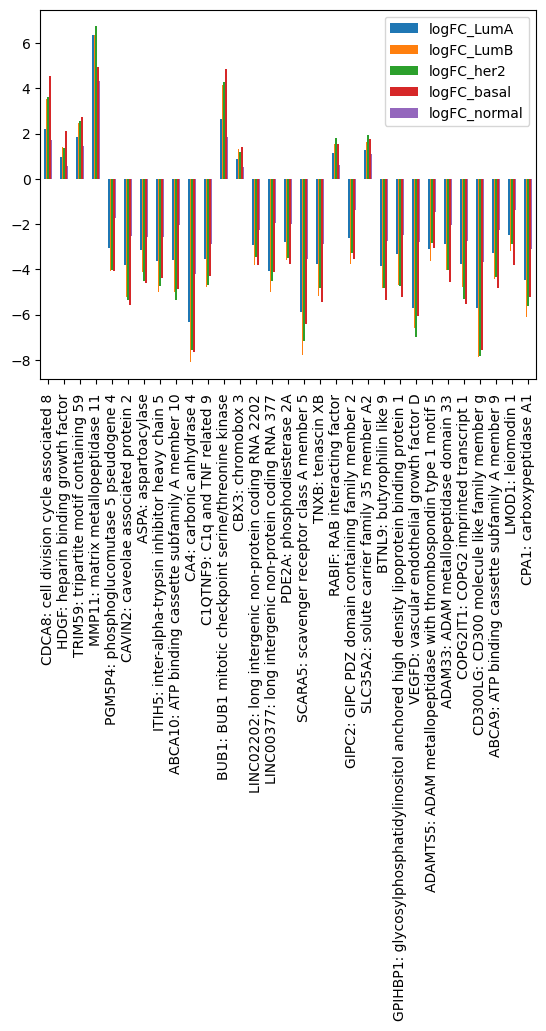

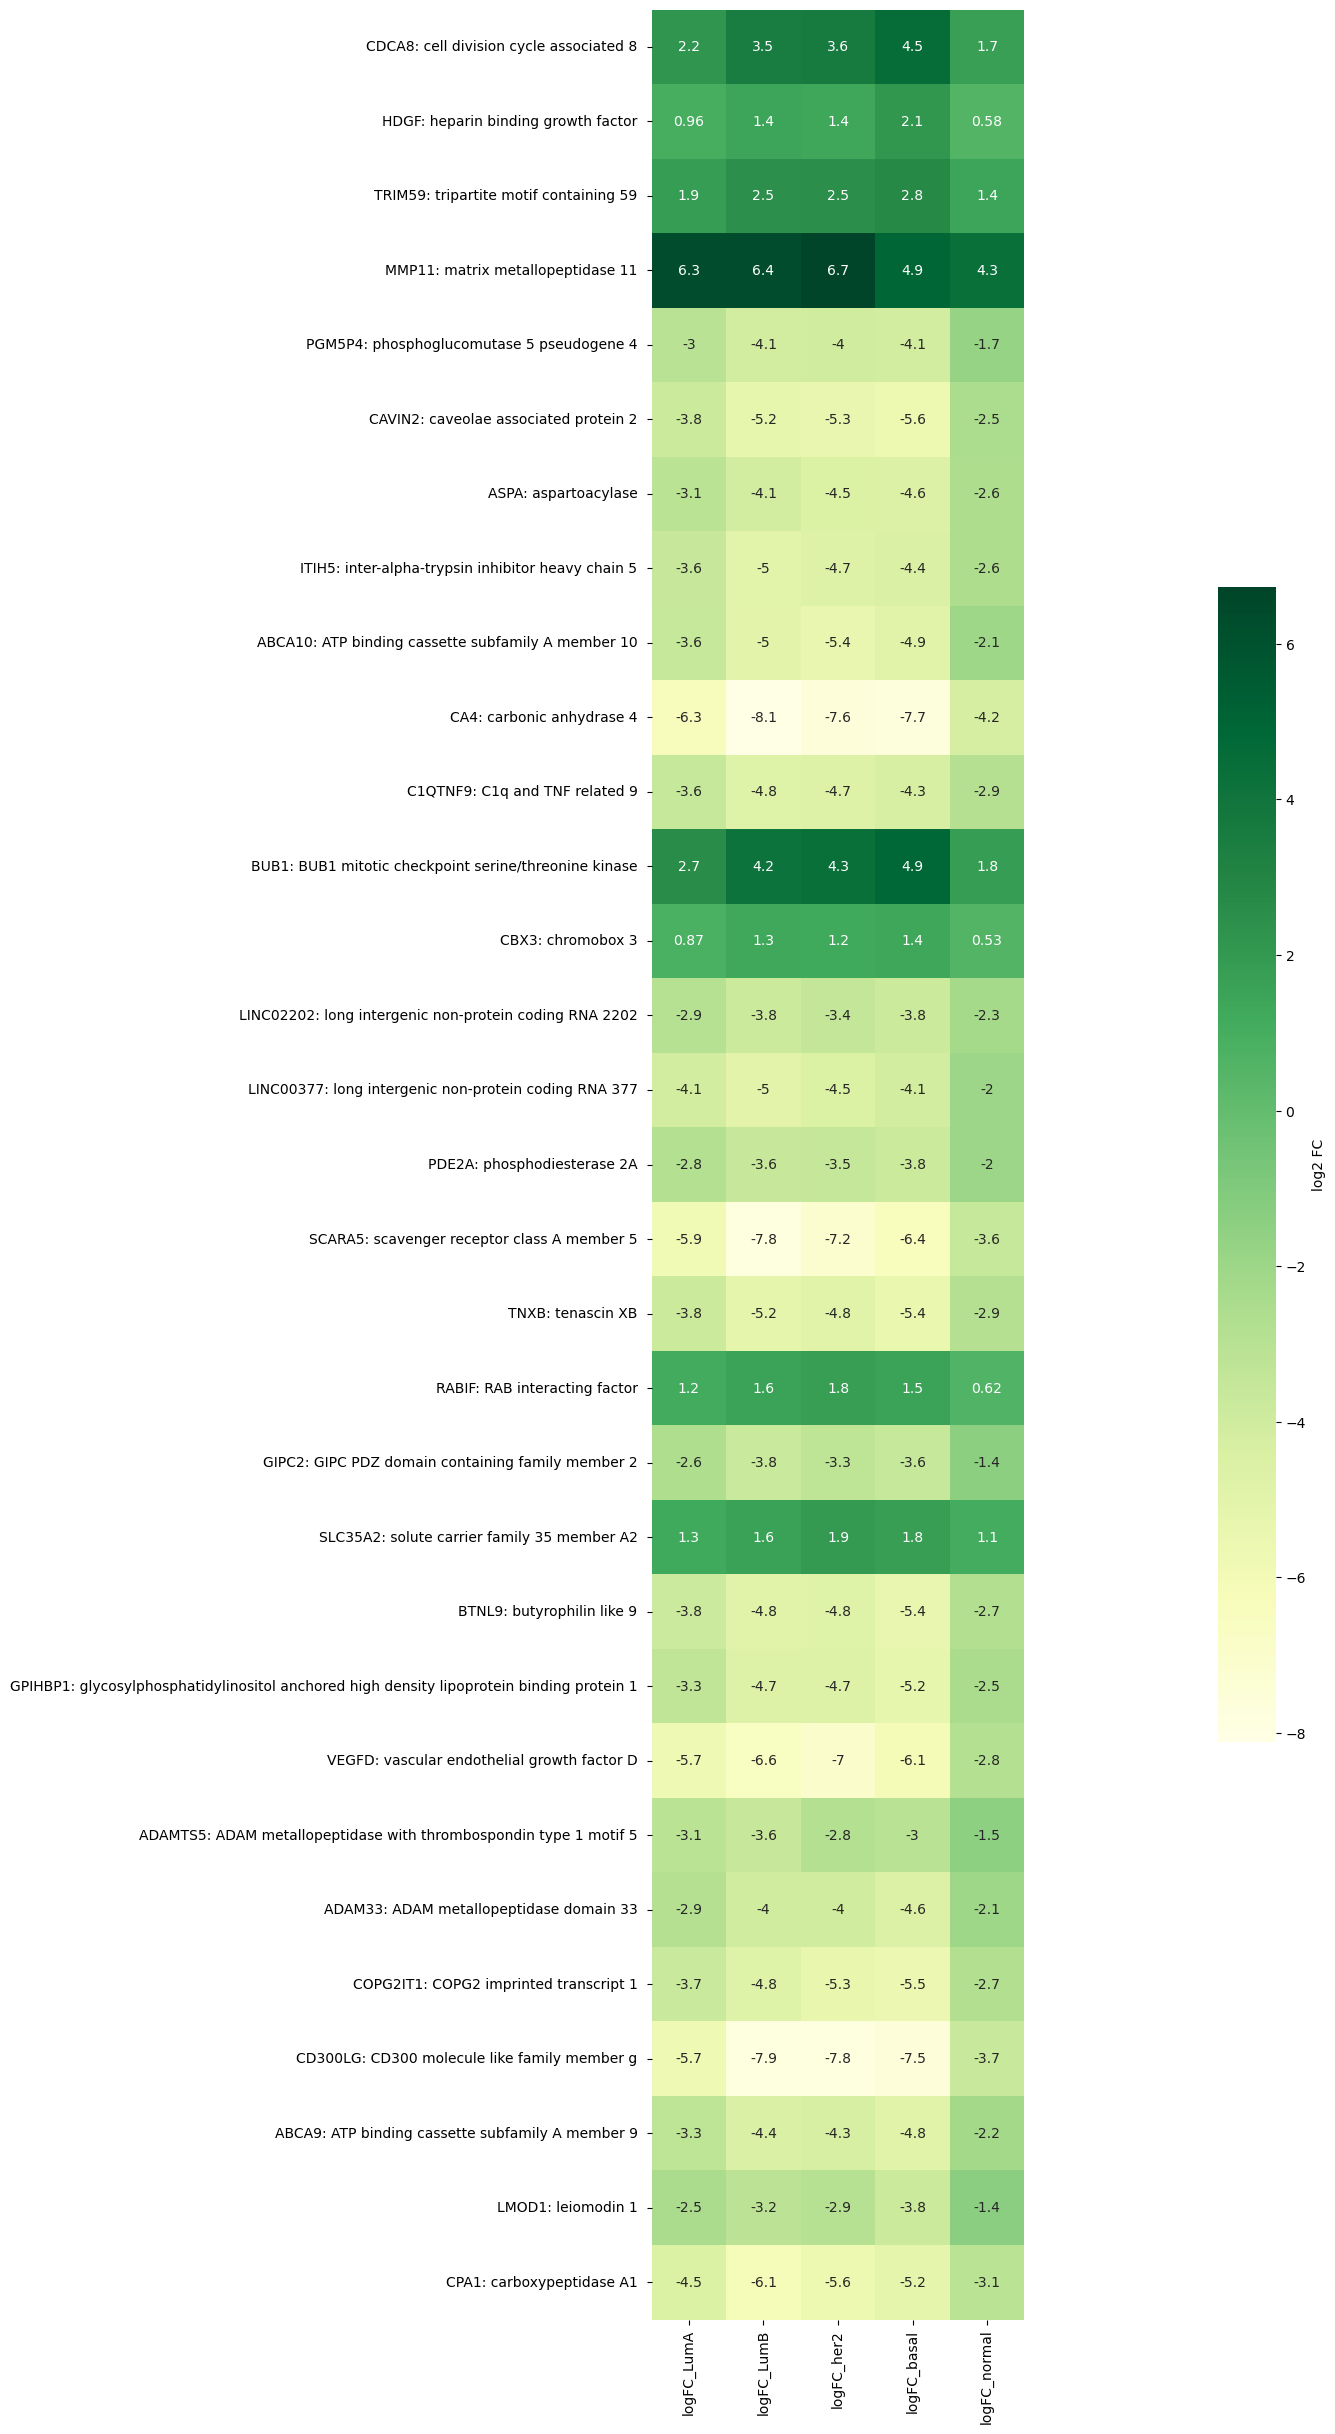

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = inter_LumA.plot.bar()
plt.subplots(figsize=(50,30))
sns.heatmap(inter_LumA.iloc[:,1:6], square=True, annot = True,annot_kws={'size': 10}, cbar_kws={'shrink': 0.5, 'label': "log2 FC"},cmap='YlGn')


In [17]:
copy_inter_LumA=inter_LumA.sort_values(by='logFC_LumA',ascending=False)

<AxesSubplot:xlabel='genes'>

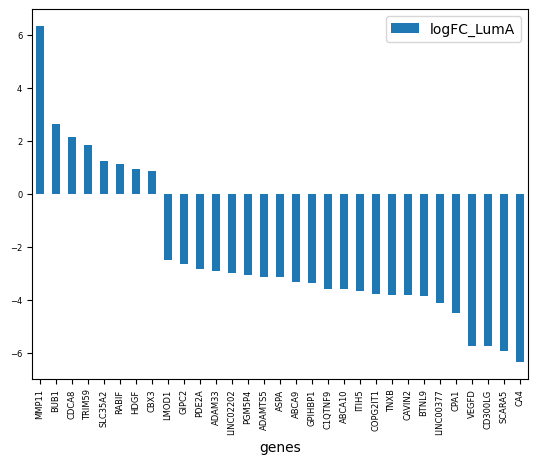

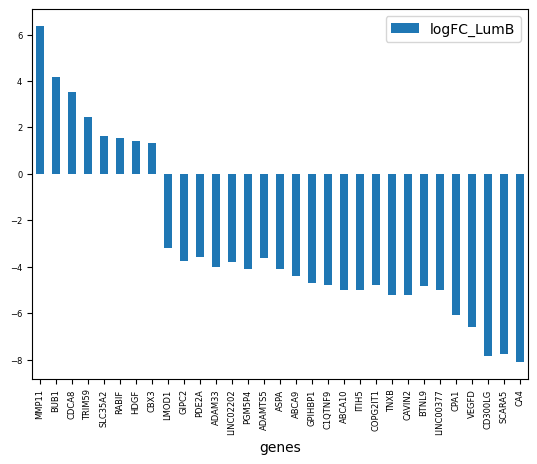

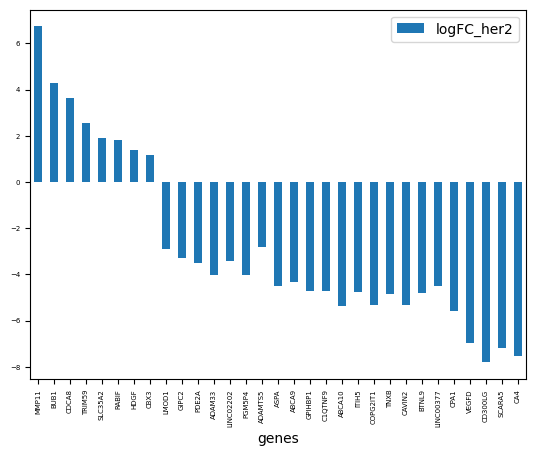

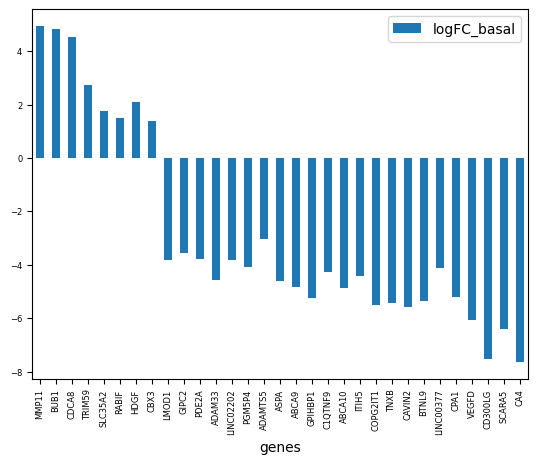

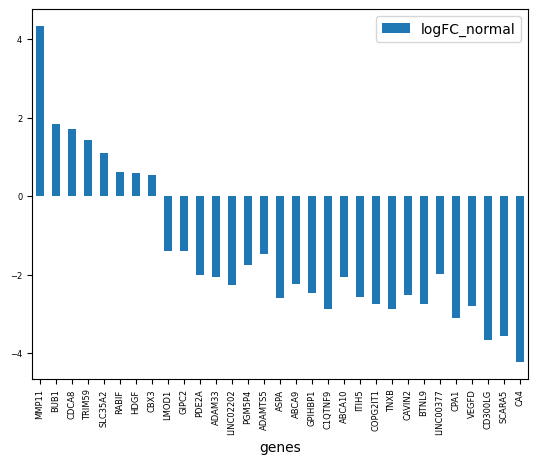

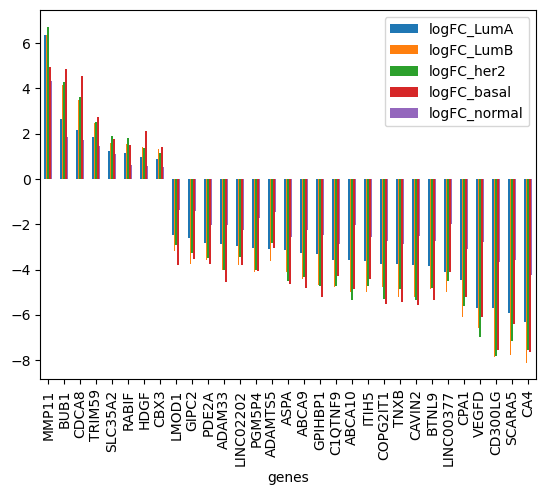

In [21]:
copy_inter_LumA.plot.bar(x='genes',y='logFC_LumA',fontsize=6)
copy_inter_LumA.plot.bar(x='genes',y='logFC_LumB',fontsize=6)
copy_inter_LumA.plot.bar(x='genes',y='logFC_her2',fontsize=5)
copy_inter_LumA.plot.bar(x='genes',y='logFC_basal',fontsize=6)
copy_inter_LumA.plot.bar(x='genes',y='logFC_normal',fontsize=6)
copy_inter_LumA.plot.bar(x='genes')

In [15]:
converted.loc[:,['incoming','name','description']]

,incoming,name,description
0,ENSG00000134690,CDCA8,cell division cycle associated 8 [Source:HGNC ...
1,ENSG00000143321,HDGF,heparin binding growth factor [Source:HGNC Sym...
2,ENSG00000213186,TRIM59,tripartite motif containing 59 [Source:HGNC Sy...
3,ENSG00000099953,MMP11,matrix metallopeptidase 11 [Source:HGNC Symbol...
4,ENSG00000225398,PGM5P4,phosphoglucomutase 5 pseudogene 4 [Source:HGNC...
5,ENSG00000168497,CAVIN2,caveolae associated protein 2 [Source:HGNC Sym...
6,ENSG00000108381,ASPA,aspartoacylase [Source:HGNC Symbol;Acc:HGNC:756]
7,ENSG00000123243,ITIH5,inter-alpha-trypsin inhibitor heavy chain 5 [S...
8,ENSG00000154263,ABCA10,ATP binding cassette subfamily A member 10 [So...
9,ENSG00000167434,CA4,carbonic anhydrase 4 [Source:HGNC Symbol;Acc:H...


<AxesSubplot:>

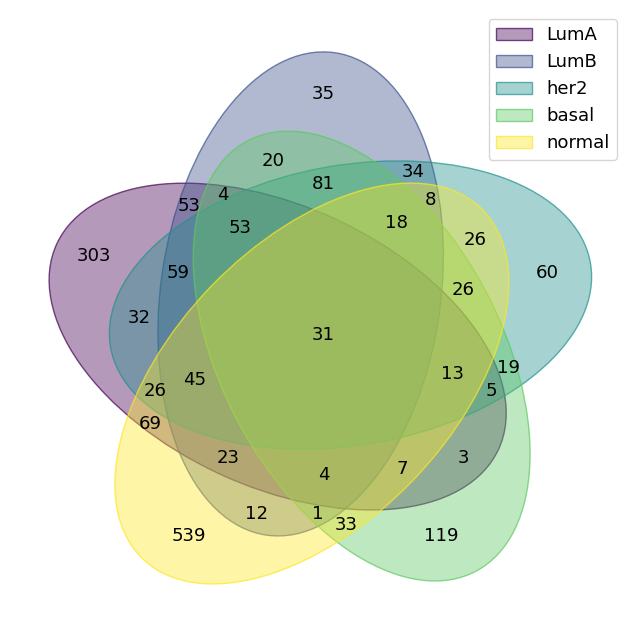

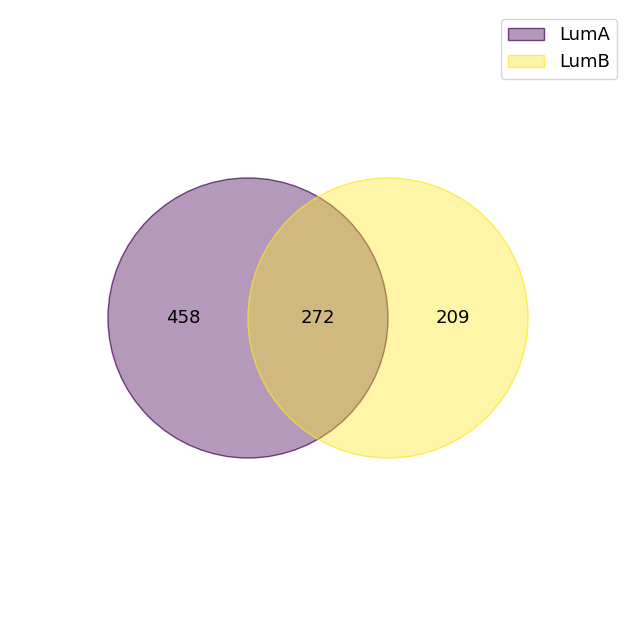

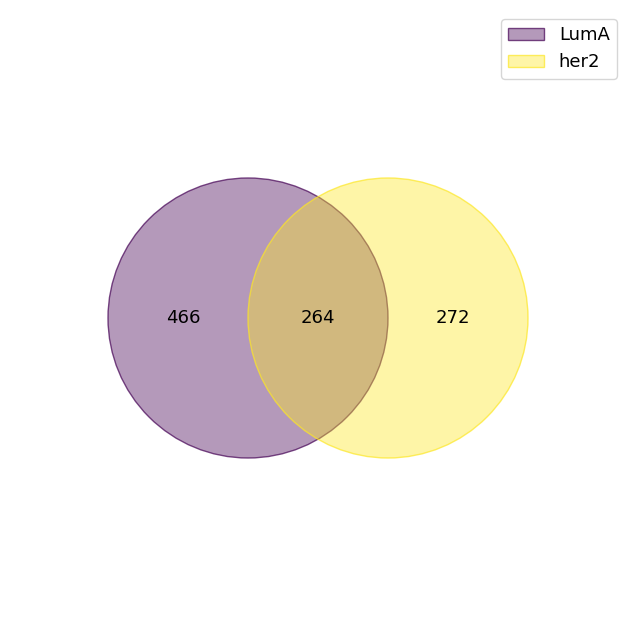

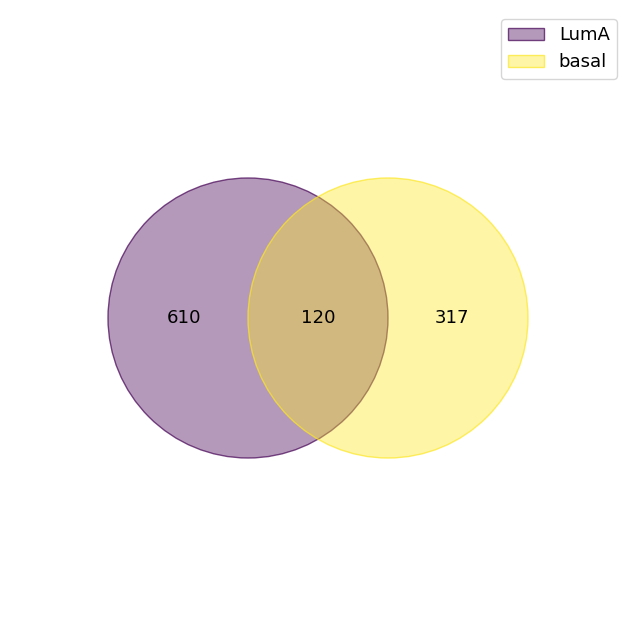

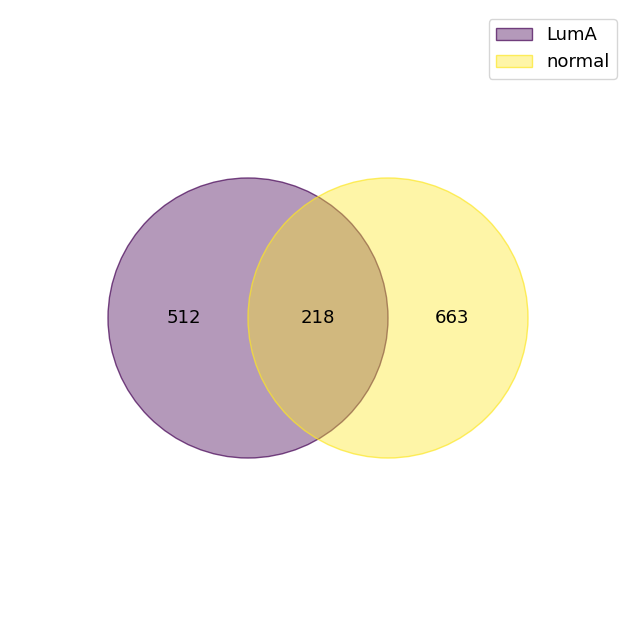

In [16]:
from venn import venn
d1 = LumA.Feature
d2 = LumB.Feature
d3 = her2.Feature
d4 = basal.Feature
d5 = normal.Feature

datas = {
    "LumA": set(d1),
    "LumB": set(d2),
    "her2": set(d3),
    "basal": set(d4),
    "normal": set(d5)
}

venn(datas)
datas1 = {
    "LumA": set(d1),
    "LumB": set(d2),
}
datas2 = {
    "LumA": set(d1),
    "her2": set(d3),
}
datas3 = {
    "LumA": set(d1),
    "basal": set(d4),
}
datas4 = {
    "LumA": set(d1),
    "normal": set(d5)
}

venn(datas1)
venn(datas2)
venn(datas3)
venn(datas4)